<a href="https://colab.research.google.com/github/derewor/SaaS-sale-analysis/blob/main/SaaS_Sales_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('/content/SaaS_sales.csv', delimiter=';')
df.drop(columns='Row ID').head(3)

,order_id,order_date,date_key,contact_name,country,city,region,subregion,customer,customer_id,industry,segment,product,license,sales,quantity,discount,profit
0,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.96,2,0.0,41.9136
1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.94,3,0.0,219.5820
2,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.62,2,0.0,6.8714


# **Exploratory Data Analysis**

In [6]:
# examine the data type of each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   order_id      9994 non-null   object 
 2   order_date    9994 non-null   object 
 3   date_key      9994 non-null   int64  
 4   contact_name  9994 non-null   object 
 5   country       9994 non-null   object 
 6   city          9994 non-null   object 
 7   region        9994 non-null   object 
 8   subregion     9994 non-null   object 
 9   customer      9994 non-null   object 
 10  customer_id   9994 non-null   int64  
 11  industry      9994 non-null   object 
 12  segment       9994 non-null   object 
 13  product       9994 non-null   object 
 14  license       9994 non-null   object 
 15  sales         9994 non-null   float64
 16  quantity      9994 non-null   int64  
 17  discount      9994 non-null   float64
 18  profit        9994 non-null 

In [7]:
# convert the order_date field in the date type.
df['order_date'] = pd.to_datetime(df['order_date'], format='mixed')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   int64         
 1   order_id      9994 non-null   object        
 2   order_date    9994 non-null   datetime64[ns]
 3   date_key      9994 non-null   int64         
 4   contact_name  9994 non-null   object        
 5   country       9994 non-null   object        
 6   city          9994 non-null   object        
 7   region        9994 non-null   object        
 8   subregion     9994 non-null   object        
 9   customer      9994 non-null   object        
 10  customer_id   9994 non-null   int64         
 11  industry      9994 non-null   object        
 12  segment       9994 non-null   object        
 13  product       9994 non-null   object        
 14  license       9994 non-null   object        
 15  sales         9994 non-null   float64 

In [8]:
df.head(2)

,Row ID,order_id,order_date,date_key,contact_name,country,city,region,subregion,customer,customer_id,industry,segment,product,license,sales,quantity,discount,profit
0,1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.96,2,0.0,41.9136
1,2,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.94,3,0.0,219.5820


In [9]:
# check for null values.
df.isnull().sum()

,0
Row ID,0
order_id,0
order_date,0
date_key,0
contact_name,0
country,0
city,0
region,0
subregion,0
customer,0


In [10]:
# Check for duplicated values.
df.duplicated().sum()

np.int64(0)

In [11]:
# Check for the desscriptive statstics.
df.describe()

,Row ID,order_date,date_key,customer_id,sales,quantity,discount,profit
count,9994.000000,9994,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2022-05-01 00:07:12.259355648,2.021803e+07,1049.771963,230.402383,3.789574,0.156203,31.310734
min,1.000000,2020-01-04 00:00:00,2.020010e+07,1001.000000,0.990000,1.000000,0.000000,-6599.978000
25%,2499.250000,2021-05-23 00:00:00,2.021052e+07,1024.000000,17.340000,2.000000,0.000000,1.814400
50%,4997.500000,2022-06-27 00:00:00,2.022063e+07,1049.000000,54.816000,3.000000,0.200000,8.790600
75%,7495.750000,2023-05-15 00:00:00,2.023052e+07,1076.000000,210.002500,5.000000,0.200000,30.194400
max,9994.000000,2023-12-31 00:00:00,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,1.123898e+04,29.719388,623.403157,2.225110,0.206452,238.572786


## The mean and median of Profit and Sales show great variation indicating data skewness.

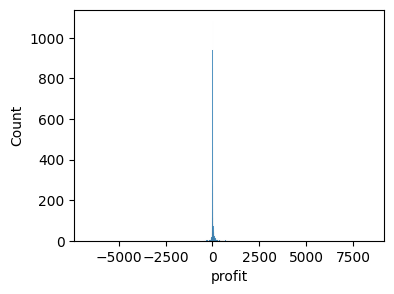

In [12]:
# Show the profit and sales distribution using the histogram.
plt.figure(figsize=(4,3))
sns.histplot(df['profit'])
plt.show()

In [13]:
# calculate the standard deviation for profit and sales.
std1 = df['profit'].std()
std2 = df['sales'].std()
print(std1, std2)

238.57278622905991 623.4031572284543


In [14]:
# extract rows in the df dataframe where the sales and profit are within 3 std of the mean.
df_new = df[(np.abs(df['sales'] - df['sales'].mean()) <= 3*df['sales'].std()) & (np.abs(df['profit'] - df['profit'].mean()) <= 3*df['profit'].std())]
df_new.shape

(9814, 19)

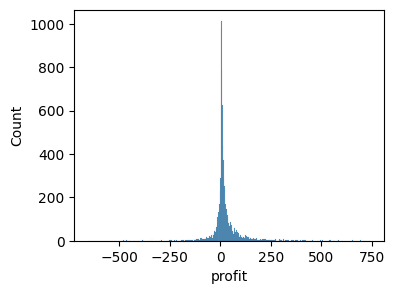

In [15]:
# Show the profit and sales distribution using the cleaned datafram.
plt.figure(figsize=(4,3))
sns.histplot(df_new['profit'])
plt.show()

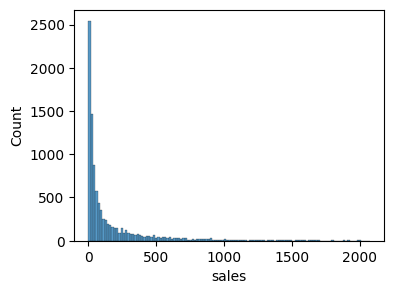

In [16]:
plt.figure(figsize=(4,3))
sns.histplot(df_new['sales'])
plt.show()

In [17]:
# How many unique countries are the customer of SaaS.
num_countries = df_new['country'].nunique()
num_countries

48

## Which top 5 countries are the highest customer of the SaaS products interms of quantity of purchase, sales value and profit?

In [18]:
# calculate the total number of SaaS products purchased per country and their sale value.
stat_country = df_new.groupby('country')[['quantity','sales','profit']].sum().reset_index().sort_values(by='profit', ascending=False)
display(stat_country.head())

,country,quantity,sales,profit
47,United States,7509,373740.2915,64036.9449
46,United Kingdom,4103,208947.7560,42776.8749
5,Canada,1817,100161.0680,21630.6093
4,Brazil,911,48624.0820,13332.3536
40,Spain,837,43282.4100,11879.4530


## Which industry sector is the key customer of the SaaS products?


In [19]:
# how many unique industries are the customer of the company.
num_industry = df_new['industry'].nunique()
num_industry

10

In [20]:
# calculate the total number of SaaS products purchased per sector and their sale value.
stat_country = df.groupby('industry')[['quantity','sales','profit']].sum().reset_index().sort_values(by='profit', ascending=False)
display(stat_country)


,industry,quantity,sales,profit
3,Finance,8007,474150.4844,57551.7596
2,Energy,4920,306478.3049,47686.9067
5,Manufacturing,4586,297066.5052,41776.7394
1,Consumer Products,3870,224044.1422,39207.8157
4,Healthcare,4022,273183.2882,35515.5432
7,Retail,3693,223072.0720,33354.6708
8,Tech,4816,264066.1297,25315.3426
0,Communications,2169,120962.2365,16191.1240
9,Transportation,1377,91026.4916,8265.8327
6,Misc,413,28591.7596,8053.7380


### Which products have the highest demand and generate the highest profit.

In [21]:
# count the unique number of products sold.
num_products = df['product'].nunique()
num_countries

48

In [22]:
# Which top5 products generate the highest profit.
stat_product = df.groupby('product')[['quantity','sales','profit']].sum().reset_index().sort_values(by='profit', ascending=False)
display(stat_product.head())

,product,quantity,sales,profit
0,Alchemy,234,149528.030,55617.8249
11,Site Analytics,3289,330007.054,46337.9066
4,Data Smasher,2976,167380.318,45100.4687
13,Support,5825,125152.744,34507.8248
5,FinanceHub,3756,340935.415,33017.5383


## Which regions is the strongest customer base?

In [23]:
# calclate the qty, sale and profit per region.
stat_region = df.groupby('region')[['quantity','sales','profit']].sum().reset_index().sort_values(by='profit', ascending=False)
display(stat_region)

,region,quantity,sales,profit
2,EMEA,16033,1.044738e+06,158640.8490
0,AMER,13879,8.378496e+05,134386.0238
1,APJ,7961,4.200536e+05,19892.5999


In [24]:
# determine the top5 products per region interms of profit.
stat_product = df.groupby(['region','product'])[['quantity','sales','profit']].sum().reset_index().sort_values(by='profit', ascending=False)
display(stat_product.head())

,region,product,quantity,sales,profit
3,AMER,ContactMatcher,2661,166236.424,27167.4551
39,EMEA,Site Analytics,1405,149057.008,25304.3495
33,EMEA,FinanceHub,1639,155230.987,21229.0296
32,EMEA,Data Smasher,1265,72162.890,20262.0884
28,EMEA,Alchemy,101,57969.136,19533.6956


In [25]:
# rank the products per region based on profit.
stat_product['rank'] = stat_product.groupby('region')['profit'].rank(ascending=False)
display(stat_product.head())

,region,product,quantity,sales,profit,rank
3,AMER,ContactMatcher,2661,166236.424,27167.4551,1.0
39,EMEA,Site Analytics,1405,149057.008,25304.3495,1.0
33,EMEA,FinanceHub,1639,155230.987,21229.0296,2.0
32,EMEA,Data Smasher,1265,72162.890,20262.0884,3.0
28,EMEA,Alchemy,101,57969.136,19533.6956,4.0


In [26]:
# extract rows where rank is less than 3.
stat_product = stat_product[stat_product['rank'] <= 3]
display(stat_product.sort_values(by='region'))

,region,product,quantity,sales,profit,rank
3,AMER,ContactMatcher,2661,166236.424,27167.4551,1.0
4,AMER,Data Smasher,1120,70328.142,19152.0253,2.0
0,AMER,Alchemy,91,49799.254,18264.2564,3.0
14,APJ,Alchemy,42,41759.640,17819.8729,1.0
25,APJ,Site Analytics,678,67052.658,10631.0486,2.0
16,APJ,ChatBot Plugin,622,5382.170,6971.6514,3.0
39,EMEA,Site Analytics,1405,149057.008,25304.3495,1.0
33,EMEA,FinanceHub,1639,155230.987,21229.0296,2.0
32,EMEA,Data Smasher,1265,72162.890,20262.0884,3.0


### There is a variation in the type of product demanded by each region. Importantly the top profitabe products are different for the three regions. This indicates the marketing strategy should be implemented accordingly.

In [27]:
# Which customer segment generates the highest profit.
stat_segment = df.groupby('segment')[['quantity','sales','profit']].sum().reset_index().sort_values(by='profit', ascending=False)
display(stat_segment)

,segment,quantity,sales,profit
1,SMB,19521,1.163679e+06,147155.1602
2,Strategic,11608,7.093092e+05,100335.7690
0,Enterprise,6744,4.296531e+05,65428.5435


In [28]:
df.order_date.agg(['min','max'])

,order_date
min,2020-01-04
max,2023-12-31


In [29]:
# determine the correlation between discount and profit.
selected_fields = ['discount','profit','sales','quantity']
df[selected_fields].corr()


,discount,profit,sales,quantity
discount,1.000000,-0.218577,-0.025526,0.008623
profit,-0.218577,1.000000,0.466208,0.057170
sales,-0.025526,0.466208,1.000000,0.199720
quantity,0.008623,0.057170,0.199720,1.000000


In [32]:
# extract year from the order date.
df['year'] = df['order_date'].dt.year
df.head(2)

,Row ID,order_id,order_date,date_key,contact_name,country,city,region,subregion,customer,customer_id,industry,segment,product,license,sales,quantity,discount,profit,year
0,1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.96,2,0.0,41.9136,2022
1,2,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.94,3,0.0,219.5820,2022


In [64]:
# determine the top 3 customers per year with the highest buys and profits.
top_10 = df.groupby(['customer', 'year'])[['quantity','sales','profit']].sum().reset_index().sort_values(by='year', ascending=False)
# rank the customers based on profit within each year.
top_10['rank'] = top_10.groupby('year')['profit'].rank(ascending=False)
# extract rows where rank is less than 3.
top_101 = top_10[top_10['rank'] <= 3].sort_values(by=(['year','rank']))
display(top_101)

,customer,year,quantity,sales,profit,rank
40,Anthem,2020,149,38627.4520,3512.3590,1.0
388,Walt Disney,2020,99,9697.8230,3369.1869,2.0
212,Johnson & Johnson,2020,117,13345.9480,2841.8385,3.0
225,Lukoil,2021,63,12992.9520,5508.8313,1.0
57,BNP Paribas,2021,125,14307.3270,3919.4427,2.0
1,AT&T,2021,154,10130.2720,3430.8107,3.0
114,Coca-Cola,2022,129,22137.6290,9253.8338,1.0
370,Valero Energy,2022,98,16353.8850,6028.3491,2.0
222,Lowes,2022,171,16251.5380,3953.0455,3.0
251,Mondelez International,2023,150,19963.6208,7357.1120,1.0


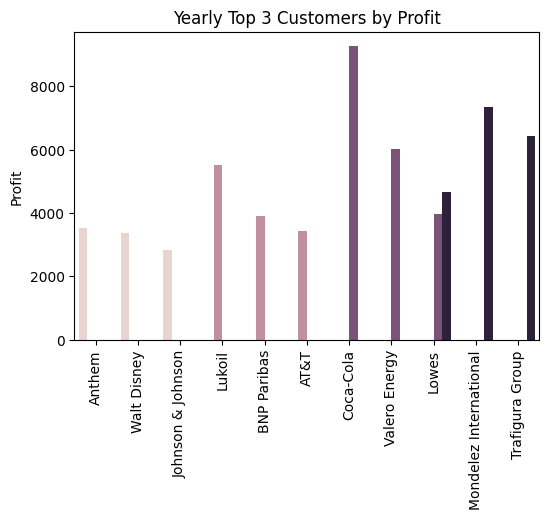

In [89]:
# plot the top 10 df using bar plot.
plt.figure(figsize=(6,4))
sns.barplot(data=top_101, x='customer', y='profit', errorbar=None, hue='year', legend=None)
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('Profit')
plt.title('Yearly Top 3 Customers by Profit')
plt.xticks(rotation=90)
plt.show()